In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/diamond-price-prediciton-2024/train.csv
/kaggle/input/diamond-price-prediciton-2024/test.csv


In [3]:

data = pd.read_csv('/kaggle/input/diamond-price-prediciton-2024/train.csv')
data.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [4]:
data.shape

(43152, 11)

In [5]:
data['color'].value_counts()

color
G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: count, dtype: int64

In [6]:
data.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [8]:
data = data.drop(['Id'], axis=1)

In [9]:
data.isnull().sum()


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [10]:
data.shape

(43152, 10)

<Axes: >

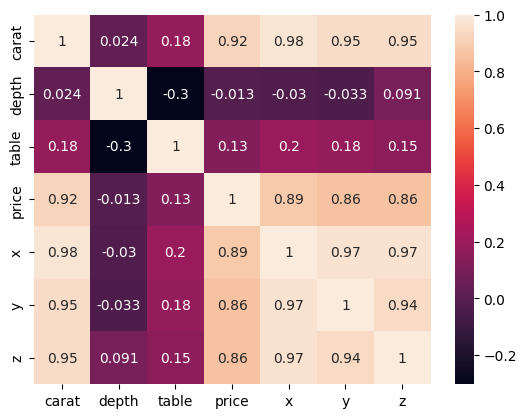

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.select_dtypes(include=np.number).corr() ,annot=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

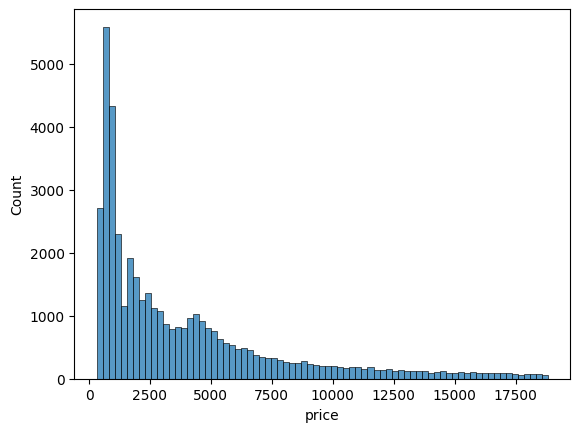

In [24]:
sns.histplot(data['price'])

In [14]:
col_object = data.select_dtypes(exclude=np.number).columns
col_object

Index(['cut', 'color', 'clarity'], dtype='object')

In [15]:
for col in col_object :
    print('     col name: ',col)
    print(data[col].value_counts())
    print('-'*20)
    

     col name:  cut
cut
Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: count, dtype: int64
--------------------
     col name:  color
color
G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: count, dtype: int64
--------------------
     col name:  clarity
clarity
SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: count, dtype: int64
--------------------


Text(0, 0.5, 'price')

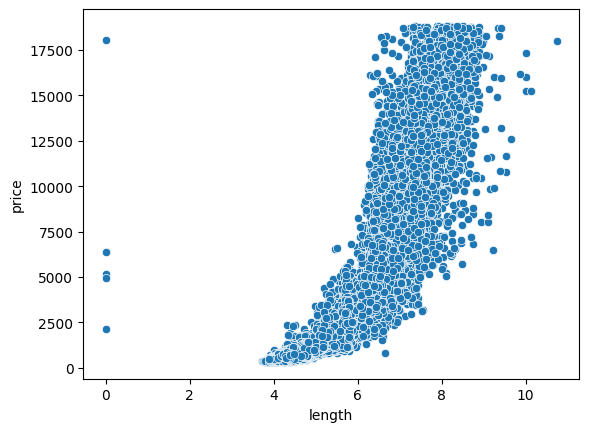

In [21]:
sns.scatterplot(data = data , x = data['x'], y=data['price'])

plt.xlabel('length')
plt.ylabel('price')

Text(0, 0.5, 'price')

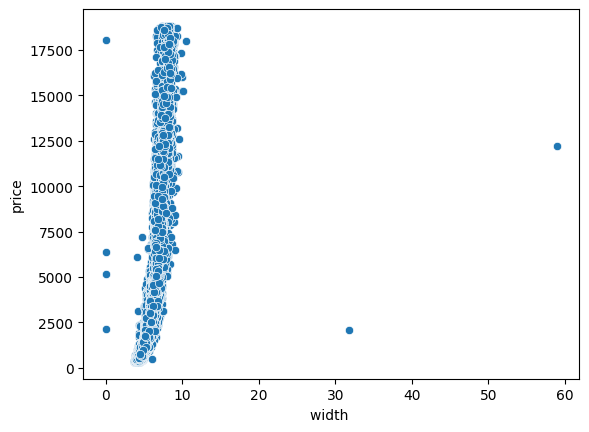

In [22]:
sns.scatterplot(data = data , x = data['y'], y=data['price'])

plt.xlabel('width ')
plt.ylabel('price')

Text(0, 0.5, 'price')

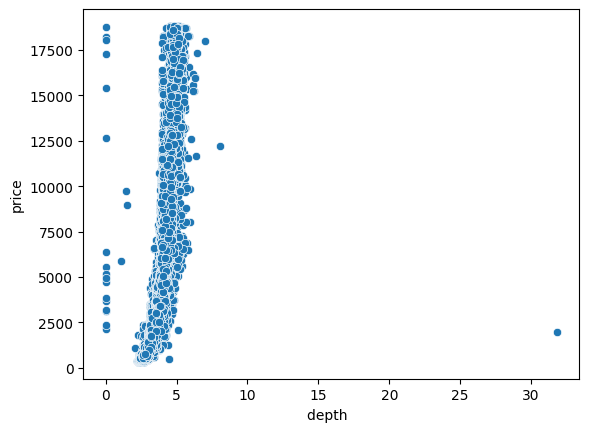

In [23]:
sns.scatterplot(data = data , x = data['z'], y=data['price'])

plt.xlabel('depth  ')
plt.ylabel('price')

# Train test

In [25]:
X = data.drop('price', axis=1)
y = data['price']

# Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder 

encoder = LabelEncoder()
def encodeObjectData(data):
    columns = data.select_dtypes(exclude=np.number).columns
    print(columns)
    for i in columns :
        data[i] = encoder.fit_transform(data[i])
    return data
        
X = encodeObjectData(X)
X.head()

Index(['cut', 'color', 'clarity'], dtype='object')


,carat,cut,color,clarity,depth,table,x,y,z
0,1.06,2,5,3,61.8,57.0,6.57,6.60,4.07
1,1.51,3,3,7,60.9,58.0,7.38,7.42,4.51
2,0.32,2,2,5,61.3,56.0,4.43,4.41,2.71
3,0.53,2,3,5,61.2,56.0,5.19,5.22,3.19
4,0.70,3,4,7,61.0,57.0,5.76,5.72,3.50


# Scalling

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1))

def scaleNumData(data):
    columns = data.select_dtypes(include=np.number).columns
    print(columns)
    for i in columns :
        data[i] = scaler.fit_transform(data[i].values.reshape(-1, 1))
    return data
        
X = scaleNumData(X)
X.head()


Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')


,carat,cut,color,clarity,depth,table,x,y,z
0,-0.642412,0.0,0.666667,-0.142857,0.044444,-0.461538,0.223464,-0.775891,-0.744025
1,-0.455301,0.5,0.000000,1.000000,-0.005556,-0.423077,0.374302,-0.748048,-0.716352
2,-0.950104,0.0,-0.333333,0.428571,0.016667,-0.500000,-0.175047,-0.850255,-0.829560
3,-0.862786,0.0,0.000000,0.428571,0.011111,-0.500000,-0.033520,-0.822750,-0.799371
4,-0.792100,0.5,0.333333,1.000000,0.000000,-0.461538,0.072626,-0.805772,-0.779874


In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [21]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



rand_forest = RandomForestRegressor(n_estimators=150)

rand_forest.fit(x_train, y_train)
rand_forest_predictions = rand_forest.predict(x_test)


mse_rand_test= mean_squared_error(rand_forest_predictions , y_test)
mse_rand_train= mean_squared_error(rand_forest.predict(x_train), y_train)

print('Error rand of test : ',np.sqrt(mse_rand_test))
print('Error rand of train : ',np.sqrt(mse_rand_train))


Error rand of test :  545.323314108055
Error rand of train :  208.3841503363889


In [22]:
rand_forest_predictions

array([12345.13333333, 14079.62666667,  7169.32666667, ...,
        5256.56666667,  4948.42      , 10452.69333333])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

import numpy as np

# Define the Random Forest regressor
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300,400,500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Calculate mean squared error on test set
test_mse = mean_squared_error(y_test, y_pred)
print("Test Mean Squared Error:", test_mse)


# best model

In [2]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

re = GradientBoostingRegressor(learning_rate= 0.2, max_depth= 5, max_features=None, min_samples_leaf= 4, min_samples_split= 10, n_estimators=200)
re.fit(x_train, y_train)


mse_test= mean_squared_error( re.predict(x_test), y_test)
mse_train= mean_squared_error(re.predict(x_train), y_train)

print('Error rand of test r: ',np.sqrt(mse_test))
print('Error rand of train r: ',np.sqrt(mse_train))

print('Error rand of test : ',mse_test)
print('Error rand of train : ',mse_rand_train

# Test

In [23]:
data_test = pd.read_csv('/kaggle/input/diamond-price-prediciton-2024/test.csv')
data_test.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [24]:
data_test.isnull().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [25]:
Id = data_test['Id'].values

In [26]:
data_test = data_test.drop('Id',axis=1)
data_test = encodeObjectData(data_test)
data_test = scaleNumData(data_test)

data_test.head()

Index(['cut', 'color', 'clarity'], dtype='object')
Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')


,carat,cut,color,clarity,depth,table,x,y,z
0,0.032558,0.50,0.500000,1.000000,0.284,0.304348,0.441838,0.440945,0.409226
1,0.118605,0.75,0.166667,0.714286,0.348,0.347826,0.561095,0.559055,0.532738
2,0.055814,1.00,0.833333,0.571429,0.352,0.260870,0.472141,0.480315,0.453869
3,0.141860,0.75,0.166667,0.428571,0.244,0.391304,0.595308,0.593504,0.543155
4,0.046512,0.50,0.500000,0.857143,0.288,0.260870,0.463343,0.472441,0.434524


In [27]:
pred = re.predict(data_test)
pred


array([ 3549.57333333,  4815.32666667,  3249.16      , ...,
        6056.95333333, 13995.22      , 14384.86      ])

In [28]:
df = pd.DataFrame({'id': Id , 'price': pred})
df.to_csv('submit.csv', index=False) 

In [29]:
df.head()

,id,price
0,1,3549.573333
1,2,4815.326667
2,3,3249.160000
3,4,4827.493333
4,5,3602.280000
